In this notebook, we review material from previous lectures:

* [ggplot](#ggplot)
    * aesthetics
    * geometries
    * faceting
    * statistical transformations
    * position adjustments
    * coordinate transformations
* [dplyr verbs](#dplyr-verbs)
    * filter
    * arrange
    * select
    * rename
    * mutate
    * transmute
    * group_by
    * summarize
* [pipes](#pipes)
* [EDA](#EDA)
    * visualizing distributions
    * typical values
    * unusual values
    * missing values
    * covariation

# ggplot

In [11]:
options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)

What's wrong with this code to produce a scatter plot of `hwy` vs `displ` with the `color` aesthetic mapped to `drv`?

In [24]:
tryCatch({
  ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), color = drv) # attempt to create a scatter plot
},
error = function(err) {
 print(err)
})


<simpleError in layer(data = data, mapping = mapping, stat = stat, geom = GeomPoint,     position = position, show.legend = show.legend, inherit.aes = inherit.aes,     params = list(na.rm = na.rm, ...)): object 'drv' not found>


What does `se = FALSE` do in the code below?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



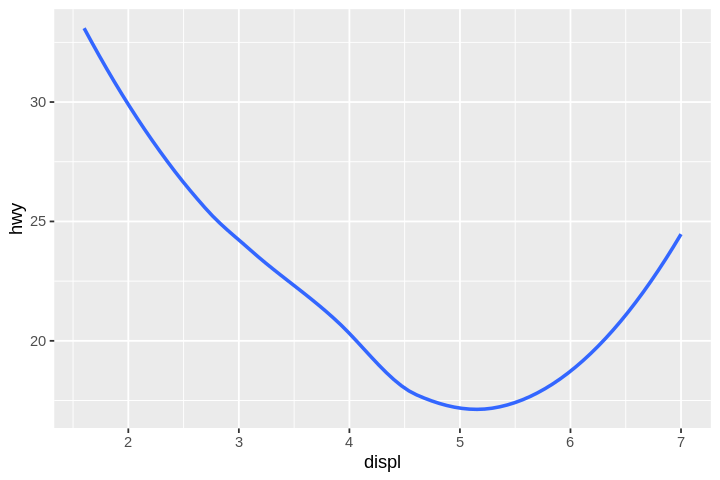

In [13]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy), se = FALSE)

It sets the standard error to FALSE, i.e., the gray regions around the fitted curve will not be displayed.

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot1.png)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



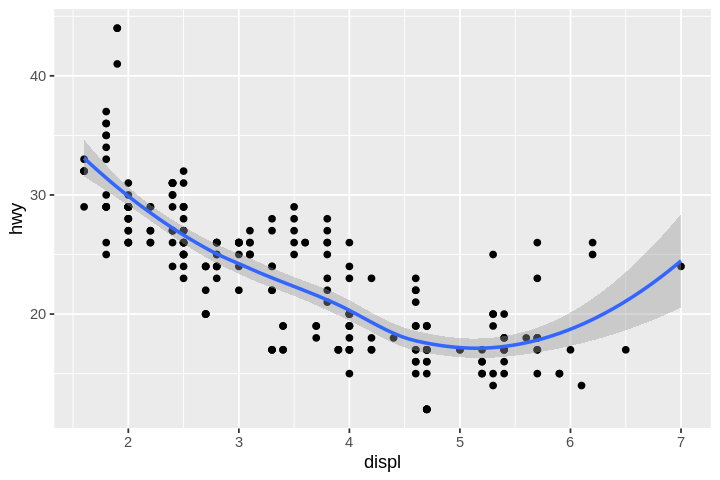

In [14]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy)) +
    geom_point() +
    geom_smooth()

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot2.png)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



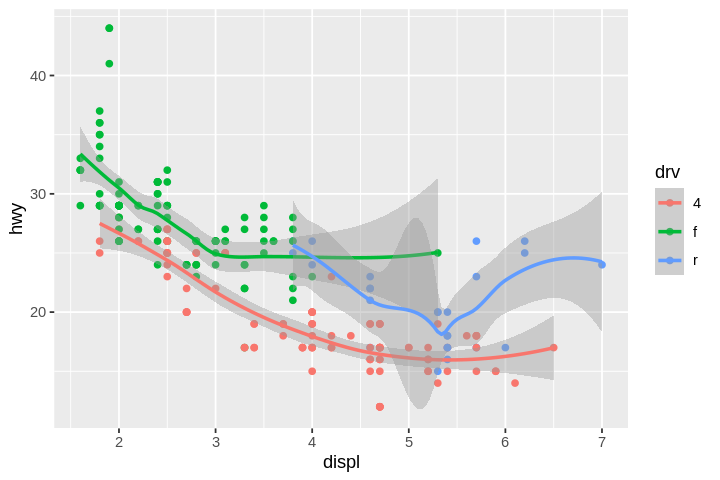

In [15]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy,color=drv)) +
    geom_point() +
    geom_smooth()

Match the geometries below with their statistical transformations.

| Geometry       | Stat     |
|----------------|----------|
| geom_point     | bin      |
| geom_histogram | count    |
| geom_bar       | identity |

Answer:

| Geometry       | Stat     |
|----------------|----------|
| geom_point     | identity |
| geom_histogram | identity |
| geom_bar       | count    |

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot3.png)

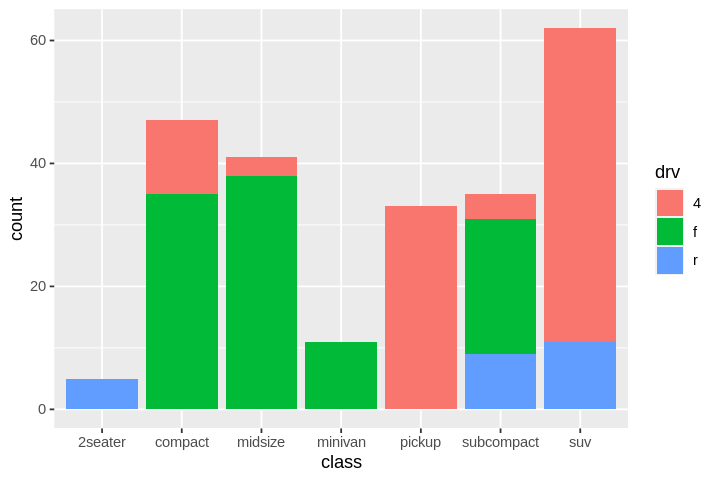

In [16]:
ggplot(data=mpg) +
    geom_bar(mapping=aes(x=class,fill=drv))

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot4.png)

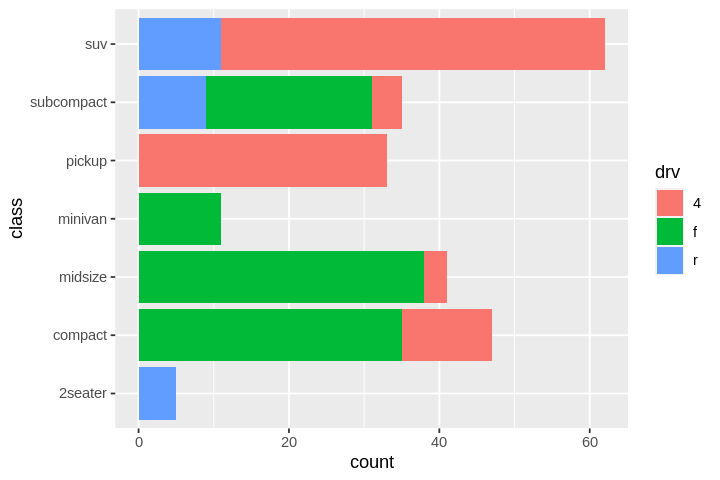

In [17]:
ggplot(data=mpg) +
    geom_bar(mapping=aes(x=class,fill=drv)) +
    coord_flip()

# dplyr verbs

What's wrong in the code fragments below?

In [18]:
tryCatch({
  filter(mpg, drv == f) # find vehicles with front wheel drive
},
error = function(err) {
 print(err)
})

<error/dplyr_error>
Error in `h()`:
! Problem with `filter()` input `..1`.
ℹ Input `..1` is `drv == f`.
✖ object 'f' not found
Backtrace:
  1. IRkernel::main()
 34. base::.handleSimpleError(...)
 35. dplyr h(simpleError(msg, call))


In [19]:
# f should be in quotes since drv is of chr type
filter(mpg, drv == "f")

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
chevrolet,malibu,2.4,1999,4,auto(l4),f,19,27,r,midsize
chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize


In [20]:
filter(mpg, drv <> '4')) # find vehicles that do not have 4 wheel drives

ERROR: ignored

In [ ]:
# the R operator for inequality is !=, also the second right parenthesis isn't needed
filter(mpg, drv != '4')

In [ ]:
filter(mpg, manufacturer = toyota & class = suv) # find all suvs made by toyota

In [ ]:
# toyota and suv should be in quotes, and test of equality needs ==
filter(mpg, manufacturer == "toyota" & class == "suv")

In [ ]:
number_of(filter(mpg, cyl == 4)) # find the number of vehicle with 4 cylinders

In [ ]:
# nrow computes no. of rows in a tibble (and ncol computes no. of columns)
nrow(filter(mpg, cyl == 4))

# pipes

What's wrong in the code fragments below?

In [ ]:
# show only the highway mileage of suvs sorted in descending order of the mileage
select(mpg, hwy) %>%
    filter(class == 'suv') %>%
    arrange(hwy)

In [ ]:
filter(mpg, class == 'suv') %>%
    select(hwy) %>%
    arrange(hwy)

In [ ]:
# depth variable in diamonds is supposed to be the ratio (as a percentage) between z and mean of x,y
# add a new column new_depth where we compute it ourselves
# assign it to a variable called new_diamonds
mutate(diamonds, new_depth <- 100*2*z/(x+y)) %>%
    new_diamonds

In [ ]:
new_diamonds <- mutate(diamonds, new_depth = 100*2*z/(x+y))

In [ ]:
# check if depth and new_depth are close to each other within machine precision
filter(new_diamonds, depth == new_depth)

In [ ]:
filter(new_diamonds, near(depth, new_depth))

In [ ]:
# Note that distance is in miles and air_time is in minutes
#
# add a speed variable in m.p.h. obtained by dividing distance and air_time, then
# select only speed and distance, then
# plot a scatter of speed (y axis) vs distance (x axis)
library(nycflights13)
mutate(flights, speed = 60*distance/air_time) %>%
    select(flights, distance, air_time) %>%
    ggplot(mapping = aes(x = distance, y = air_time)) +
        geom_point()

In [ ]:
mutate(flights, speed = 60*distance/air_time) %>%
    select(speed, distance) %>%
    ggplot(mapping = aes(x = distance, y = speed)) +
        geom_point()

In [ ]:
# show a bar chart of average highway mileage of vehicle produced by each manufacturer
# manufacturer names are long so make sure to flip the coordinate axes in the bar chart
mpg %>%
    group(manufacturer) %>%
    summarize(average_hwy = mean(hwy)) %>%
    ggplot() %>%
        geom_bar(mapping = aes(x = manufacturer, y = hwy)) +
        coord_flip()

In [ ]:
mpg %>%
    group_by(manufacturer) %>%
    summarize(average_hwy = mean(hwy)) %>%
    ggplot() +
        geom_bar(mapping = aes(x = manufacturer, y = average_hwy), stat = "identity") +
        coord_flip()

# EDA

Write the command to produce the following plot.

Note that the `speed` (in m.p.h.) variable has been computed using `distance` (in miles) and `air_time` (in minutes) variables. `binwidth` was 10 m.p.h.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot5.png)

In [ ]:
mutate(flights, speed = 60*distance/air_time) %>%
    ggplot() +
        geom_histogram(aes(x=speed), binwidth=10)

Write the command to produce the following plot using the `mpg` data set.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot6.png)

In [ ]:
ggplot(mpg) +
    geom_bar(aes(x=manufacturer,fill=class)) +
    coord_flip()

Write the command to produce the following plot using the `mpg` data set.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot7.png)

In [ ]:
ggplot(mpg) +
    geom_boxplot(aes(x=manufacturer,y=hwy)) +
    coord_flip()

Write the command to produce the following plot.

Note that the `speed` (in m.p.h.) variable has been computed using `distance` (in miles) and `air_time` (in minutes) 

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot8.png)

In [ ]:
mutate(flights, speed = 60*distance/air_time) %>%
    select(speed, distance) %>%
    ggplot(mapping = aes(x = distance, y = speed)) +
        geom_hex()